In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import List, Tuple
import os
import sys
import logging  
from scipy import stats
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.ndimage import gaussian_filter1d

from zstack_manager import ZStackManager, DataGenerator, ZStackPlotter

from posterior_analyzer import PosteriorAnalyzer

#from metropolis_hastings_sampler import MetropolisHastingsSampler


# Configure logging (only needed if it's not already configured)
logging.basicConfig(
    level=logging.INFO, 
    format="%(asctime)s - %(name)s - %(levelname)s - %(message)s"
)

2025-04-02 02:14:55,370 - posterior_analyzer - INFO - Shifting narrowest HDI left by 0.0095 to include MAP=0.0688
2025-04-02 02:14:55,372 - posterior_analyzer - INFO - Shifting narrowest HDI left by 0.0095 to include MAP=0.0688


MAP estimate: 0.0688
Min: 0.0000
Max: 13.7616
Mass at zero: 0.14%
5% HDI: [0.0688, 0.1387]
10% HDI: [0.0000, 0.1697]
50% HDI: [0.0000, 1.4519]
90% HDI: [0.0000, 4.6378]
95% HDI: [0.0000, 6.2517]


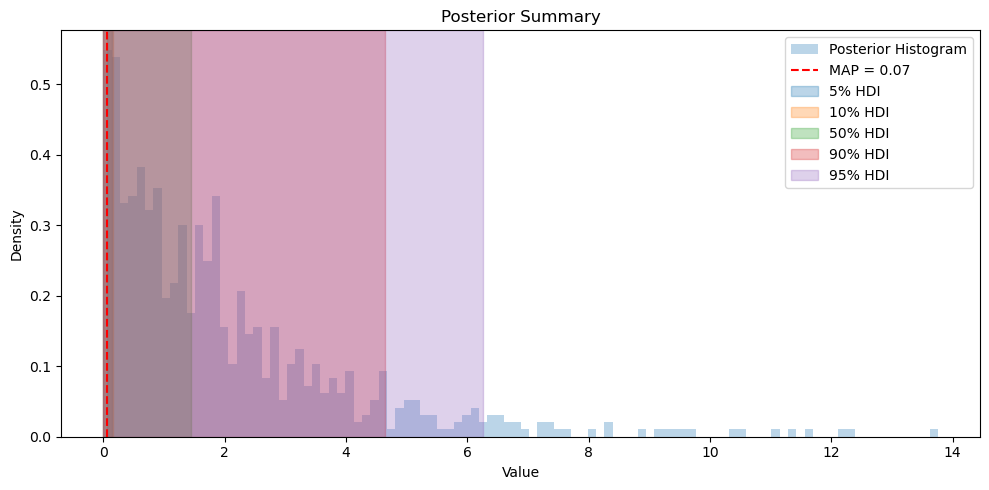

In [35]:
samples = np.concatenate([
    np.zeros(1),
    np.random.exponential(scale=2, size=700)
])

analyzer = PosteriorAnalyzer(samples, credible_masses=[0.05, 0.1, 0.5, 0.9, 0.95],)

analyzer.analyze()

analyzer.print_summary()

analyzer.plot_summary()

In [6]:
failed_map, failed_hdi = PosteriorAnalyzer.test_posterior_analyzer()

if failed_map:
    print(f"\n🔴 MAP containment failed for: {', '.join(failed_map)}")
else:
    print("\n✅ All MAP containment tests passed.")

if failed_hdi:
    print(f"🔴 HDI nesting failed for: {', '.join(failed_hdi)}")
else:
    print("✅ All HDI nesting tests passed.")


2025-04-02 02:14:39,887 - posterior_analyzer - INFO - Shifting narrowest HDI right by 35.1816 to include MAP=36.1806


2025-04-02 02:14:39,893 - posterior_analyzer - INFO - Shifting narrowest HDI right by 29.3826 to include MAP=30.3939


✅ MAP is contained in all HDIs for Normal
✅ HDIs are nested for Normal
✅ MAP is contained in all HDIs for Half-Normal
✅ HDIs are nested for Half-Normal
✅ MAP is contained in all HDIs for Cauchy
✅ HDIs are nested for Cauchy
✅ MAP is contained in all HDIs for Laplace
✅ HDIs are nested for Laplace
✅ MAP is contained in all HDIs for Power-Law
✅ HDIs are nested for Power-Law
✅ MAP is contained in all HDIs for Bimodal
✅ HDIs are nested for Bimodal
✅ MAP is contained in all HDIs for Student-t (df=1)
✅ HDIs are nested for Student-t (df=1)
✅ MAP is contained in all HDIs for Beta(0.5, 0.5)
✅ HDIs are nested for Beta(0.5, 0.5)
✅ MAP is contained in all HDIs for Skewed Normal (α=10)
✅ HDIs are nested for Skewed Normal (α=10)
✅ MAP is contained in all HDIs for Triangular
✅ HDIs are nested for Triangular
✅ MAP is contained in all HDIs for Trimodal
✅ HDIs are nested for Trimodal
✅ MAP is contained in all HDIs for Gumbel
✅ HDIs are nested for Gumbel

Finished test suite.
MAP containment failures: []
H

# empirical

In [36]:
deterministic_path = "/home/simon/Documents/scripts/views_platform/views-models/models/purple_alien/data/generated/derministic_zstack_36_calibration_20250219_183705.pkl"
stochastic_path = "/home/simon/Documents/scripts/views_platform/views-models/models/purple_alien/data/generated/stochastic_zstack_36_calibration_20250219_183705.pkl"

In [37]:
with open(deterministic_path, "rb") as f:
    deterministic = pd.read_pickle(f)   

# remove the last dime from the deterministic numpy array it just 1
deterministic = deterministic[:, :, :, :, 0] # should happen in the class if the last dim is there... <---------------------------------- 

with open(stochastic_path, "rb") as f:
    stochastic = pd.read_pickle(f)

zstack_manager = ZStackManager(shape_stochastic=stochastic.shape, shape_deterministic=deterministic.shape)
zstack_manager.set_stochastic_zstack(stochastic)
zstack_manager.set_deterministic_zstack(deterministic)

deterministic_feature_names = ['priogrid_gid', 'col', 'row', 'month_id', 'c_id']
stochastic_feature_names = ['pred_ln_sb_best', 'pred_ln_ns_best', 'pred_ln_os_best', 'pred_ln_sb_prob', 'pred_ln_ns_prob', 'pred_ln_os_prob']
zstack_manager.set_feature_names(stochastic_feature_names, deterministic_feature_names)

2025-04-02 02:15:52,232 - zstack_manager - INFO - 
✅ ZStackManager initialized successfully with matching shapes:
   ├── (36, 180, 180, 6, 256) (stochastic)
   ├── (36, 180, 180, 5) (deterministic)
   ├── Number of months: 36
   ├── Height: 180
   ├── Width: 180
   ├── Number of stochastic features: 6
   ├── Number of deterministic features: 5
   └── Number of samples: 256
2025-04-02 02:15:52,233 - zstack_manager - INFO - 
✅Stochastic Z-stack set successfully.
2025-04-02 02:15:52,233 - zstack_manager - INFO - 
✅ Deterministic Z-stack set successfully.
2025-04-02 02:15:52,233 - zstack_manager - INFO - ✅ Stochastic feature names set successfully: ('pred_ln_sb_best', 'pred_ln_ns_best', 'pred_ln_os_best', 'pred_ln_sb_prob', 'pred_ln_ns_prob', 'pred_ln_os_prob')
2025-04-02 02:15:52,233 - zstack_manager - INFO - ✅ Deterministic feature names set successfully: ('priogrid_gid', 'col', 'row', 'month_id', 'c_id')


2025-04-02 02:17:04,242 - posterior_analyzer - INFO - Shifting narrowest HDI left by 0.0014 to include MAP=0.0044
2025-04-02 02:17:04,243 - posterior_analyzer - INFO - Shifting narrowest HDI left by 0.0014 to include MAP=0.0044


MAP estimate: 0.0044
Min: 0.0019
Max: 0.0355
Mass at zero: 0.00%
5% HDI: [0.0044, 0.0047]
10% HDI: [0.0039, 0.0047]
50% HDI: [0.0038, 0.0088]
90% HDI: [0.0027, 0.0197]
95% HDI: [0.0019, 0.0254]


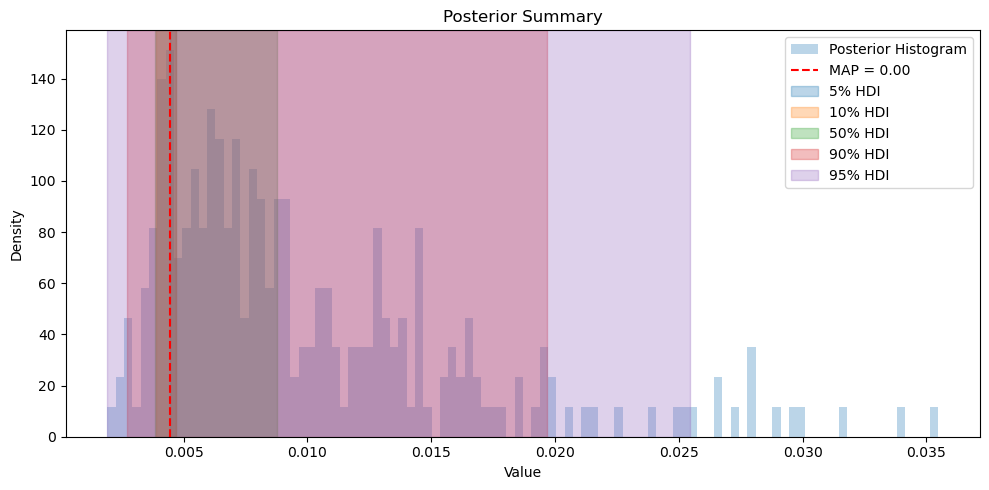

In [40]:
samples  = zstack_manager.zstack['stochastic'][0,90,90,4,:].reshape(-1)


analyzer = PosteriorAnalyzer(samples, credible_masses=[0.05, 0.1, 0.5, 0.9, 0.95],)

analyzer.analyze()

analyzer.print_summary()

analyzer.plot_summary()

